# **DL: autoencoder**

## **lab: autoencoder with TensorFlow (MNIST)**

Dong Gyun Ko <br/>
last updated: july 9, 2022

## **1. import library**

In [1]:
# import library

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## **2. autoencoder**

### **2.1. import data**

In [2]:
# import training & test data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0],28*28)) / 255
x_test = x_test.reshape((x_test.shape[0],28*28)) / 255

In [3]:
# use only 1,5,6 digits to visualize

train_idx1 = np.array(np.where(y_train == 1))
train_idx5 = np.array(np.where(y_train == 5))
train_idx6 = np.array(np.where(y_train == 6))
train_idx = np.sort(np.concatenate((train_idx1, train_idx5, train_idx6), axis= None))

test_idx1 = np.array(np.where(y_test == 1))
test_idx5 = np.array(np.where(y_test == 5))
test_idx6 = np.array(np.where(y_test == 6))
test_idx = np.sort(np.concatenate((test_idx1, test_idx5, test_idx6), axis= None))

train_imgs = x_train[train_idx]
train_labels = y_train[train_idx]
test_imgs = x_test[test_idx]
test_labels = y_test[test_idx]
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_imgs.shape))

The number of training images : 18081, shape : (18081, 784)
The number of testing images : 2985, shape : (2985, 784)


### **2.2. autoencoder structure**

In [4]:
# define autoencoder structure

# encoder structure
encoder = tf.keras.models.Sequential([tf.keras.layers.Dense(500, activation = 'relu', input_shape = (28*28,)),
                                      tf.keras.layers.Dense(300, activation = 'relu'),
                                      tf.keras.layers.Dense(2, activation = None)
                                      ])

# decoder structure
decoder = tf.keras.models.Sequential([tf.keras.layers.Dense(300, activation = 'relu', input_shape = (2,)),
                                      tf.keras.layers.Dense(500, activation = 'relu'),
                                      tf.keras.layers.Dense(28*28, activation = None)
                                      ])

# autoencoder = encoder + decoder
autoencoder = tf.keras.models.Sequential([encoder, decoder])

### **2.3. training**

In [5]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = ['mse'])

In [6]:
training = autoencoder.fit(train_imgs, train_imgs, batch_size = 50, epochs = 10)

Epoch 1/10
362/362 [==============================] - 3s 6ms/step - loss: 0.0375 - mse: 0.0375
Epoch 2/10
362/362 [==============================] - 2s 7ms/step - loss: 0.0305 - mse: 0.0305
Epoch 3/10
362/362 [==============================] - 2s 6ms/step - loss: 0.0291 - mse: 0.0291
Epoch 4/10
362/362 [==============================] - 2s 7ms/step - loss: 0.0282 - mse: 0.0282
Epoch 5/10
362/362 [==============================] - 3s 7ms/step - loss: 0.0275 - mse: 0.0275
Epoch 6/10
362/362 [==============================] - 3s 7ms/step - loss: 0.0273 - mse: 0.0273
Epoch 7/10
362/362 [==============================] - 3s 8ms/step - loss: 0.0270 - mse: 0.0270
Epoch 8/10
362/362 [==============================] - 3s 7ms/step - loss: 0.0266 - mse: 0.0266
Epoch 9/10
362/362 [==============================] - 3s 7ms/step - loss: 0.0263 - mse: 0.0263
Epoch 10/10
362/362 [==============================] - 2s 7ms/step - loss: 0.0260 - mse: 0.0260


### **2.4. testing or evaluating**

In [7]:
test_scores = autoencoder.evaluate(test_imgs, test_imgs, verbose = 2)

print('test loss: {}'.format(test_scores[0]))
print('mean squared error: {} %'.format(test_scores[1]*100))

94/94 - 0s - loss: 0.0264 - mse: 0.0264 - 344ms/epoch - 4ms/step
test loss: 0.026418395340442657
mean squared error: 2.6418395340442657 %


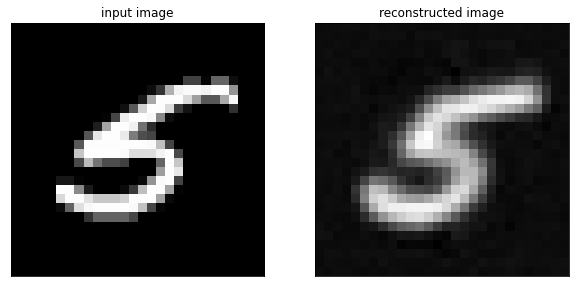

In [8]:
# visualize evaluation on test data

rand_idx = np.random.randint(1, test_imgs.shape[0])
# rand_idx = 6

test_img = test_imgs[rand_idx]
reconst_img = autoencoder.predict(test_img.reshape(1,28*28))

plt.figure(figsize = (10, 8))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28,28), 'gray')
plt.title('input image', fontsize = 12)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(reconst_img.reshape(28,28), 'gray')
plt.title('reconstructed image', fontsize = 12)
plt.xticks([])
plt.yticks([])

plt.show()

## **3. latent space and generation**

### **3.1. latent space**

In [9]:
idx = np.random.randint(0, len(test_labels), 500)

test_x, test_y = test_imgs[idx], test_labels[idx]

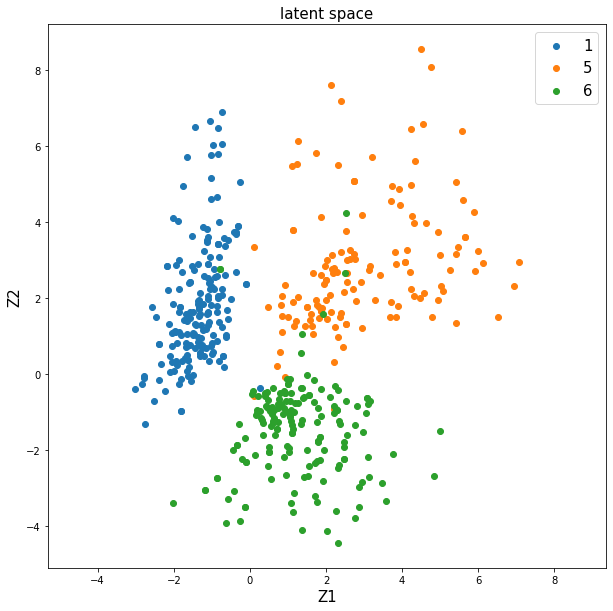

In [10]:
test_latent = encoder.predict(test_x)

plt.figure(figsize = (10,10))

plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.title('latent space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')

plt.show()

### **3.2. data generation**

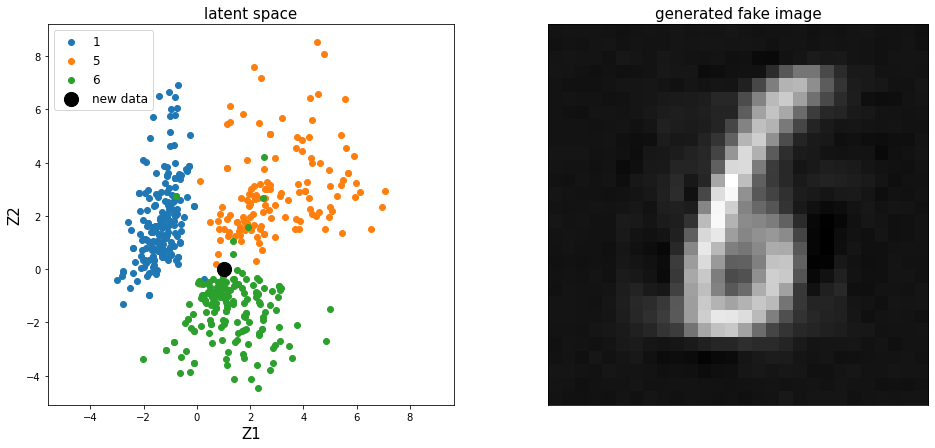

In [11]:
new_data = np.array([[1, 0]])

fake_image = decoder.predict(new_data)

plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.scatter(new_data[:,0], new_data[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('latent space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')

plt.subplot(1,2,2)
plt.imshow(fake_image.reshape(28,28), 'gray')
plt.title('generated fake image', fontsize = 15)
plt.xticks([])
plt.yticks([])

plt.show()

## **4. references**

* https://i-systems.github.io/teaching/DL/iNotes_tf2/06_Autoencoder_tf2.html